# Esame Probabilità e Statistica
#### 28-01-2021
##### Andrea Carlos Lucchese, Sara Pelargonio, Francesca Claudia Riccaboni
## Analisi dati mortalità italiana

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from PIL import Image
import matplotlib.image as mpimg
import scipy.stats as sp
import scipy as scipy

Decidiamo di effetuare una prima analisi dell'andamento geografico dell'incremento della mortalità del 2020 rispetto alla media 2015-2019 nei mesi da Gennaio a Giugno: per effettuare questa analisi qualitativa ci serviamo anche di dati ISTAT relativi a latitudine e longitudine dei comuni italiani.

In [3]:
dfgen = pd.read_excel('../data/mortalità.xlsx',skiprows=1)

coordx = pd.read_excel('../data/geo_italia.xlsx', sheet_name="italy_geo", skiprows = 0)

In [4]:
for x in range(len(coordx)):
    dfgen.loc[dfgen['NOME_COMUNE'] == coordx.iloc[x]['comune'], 'lng'] = coordx.iloc[x]['lng']
    dfgen.loc[dfgen['NOME_COMUNE'] == coordx.iloc[x]['comune'], 'lat'] = coordx.iloc[x]['lat']

In [5]:
dfgen = dfgen.dropna()
dfgen = dfgen.drop(dfgen [dfgen['01/04 - 30/04.2'] == '-'].index)
dfgen = dfgen.drop(dfgen [dfgen['01/03 - 31/03.2'] == '-'].index)
dfgen = dfgen.drop(dfgen [dfgen['01/05 - 31/05.2'] == '-'].index)
dfgen = dfgen.drop(dfgen [dfgen['01/06 - 30/06.2'] == '-'].index)
dfgen = dfgen.drop(dfgen [dfgen['01/01 - 31/01.2'] == '-'].index)
dfgen = dfgen.drop(dfgen [dfgen['01/02 - 29/02.2'] == '-'].index)

In [6]:
dfgen['01/04 - 30/04.2']=pd.to_numeric(dfgen['01/04 - 30/04.2'])
dfgen['01/03 - 31/03.2']=pd.to_numeric(dfgen['01/03 - 31/03.2'])
dfgen['01/05 - 31/04.2']=pd.to_numeric(dfgen['01/05 - 31/05.2'])
dfgen['01/06 - 30/06.2']=pd.to_numeric(dfgen['01/06 - 30/06.2'])
dfgen['01/01 - 31/01.2']=pd.to_numeric(dfgen['01/01 - 31/01.2'])
dfgen['01/02 - 29/02.2']=pd.to_numeric(dfgen['01/02 - 29/02.2'])

dfgen = dfgen.drop(dfgen [dfgen['01/04 - 30/04.2'] > 800].index)
dfgen = dfgen.drop(dfgen [dfgen['01/03 - 31/03.2'] > 800].index)
dfgen = dfgen.drop(dfgen [dfgen['01/05 - 31/05.2'] > 800].index)
dfgen = dfgen.drop(dfgen [dfgen['01/06 - 30/06.2'] > 800].index)
dfgen = dfgen.drop(dfgen [dfgen['01/01 - 31/01.2'] > 800].index)
dfgen = dfgen.drop(dfgen [dfgen['01/02 - 29/02.2'] > 800].index)


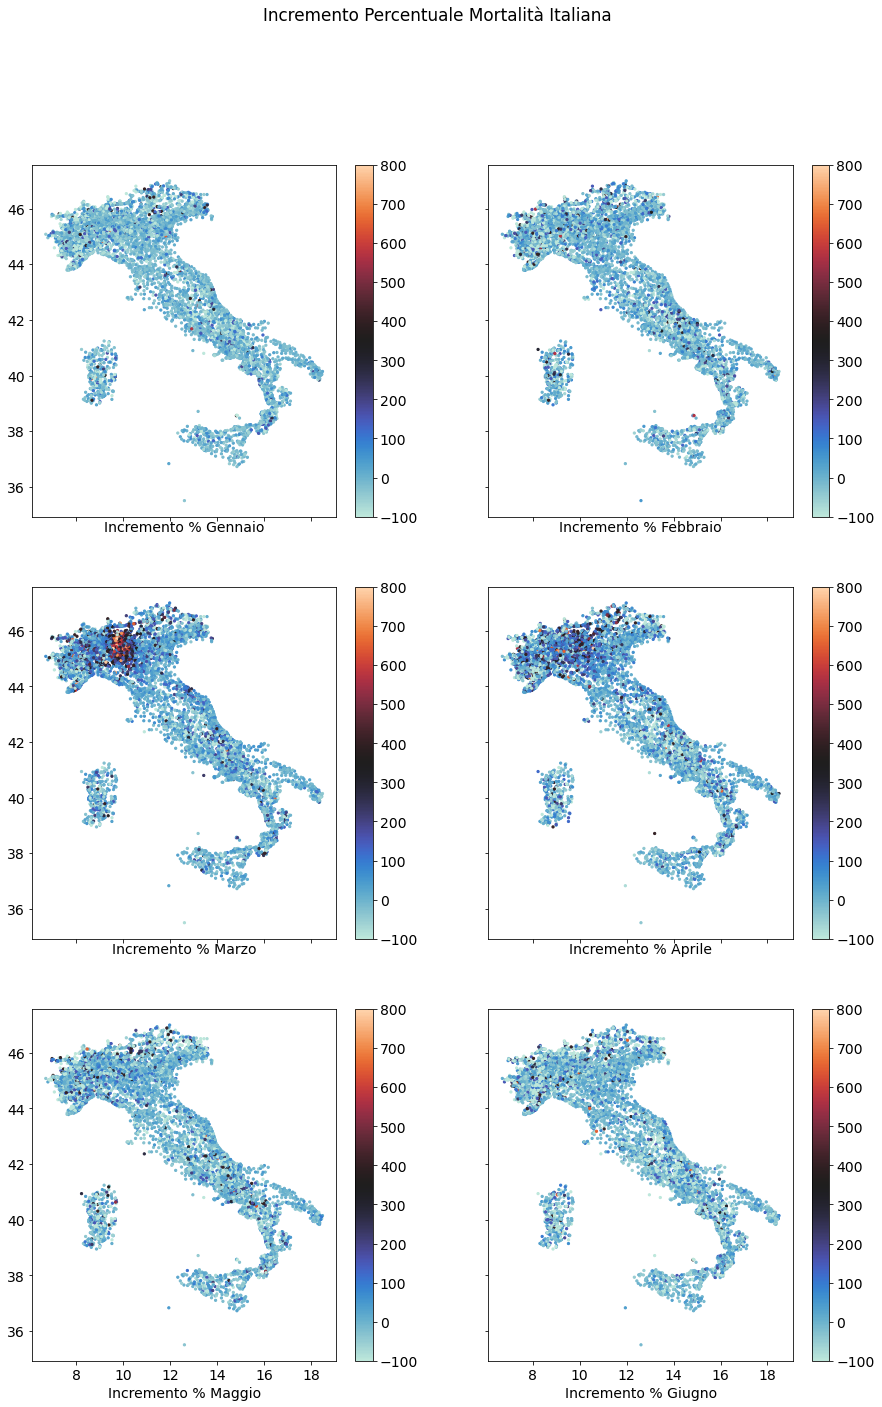

In [7]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(3,2, sharex=True,sharey=True,figsize=(15,22))

g1=ax[0,0].scatter(dfgen['lng'],dfgen['lat'] , c=dfgen['01/01 - 31/01.2'], cmap='icefire',vmin=-100,vmax=800,s=5)
g2=ax[0,1].scatter(dfgen['lng'],dfgen['lat'] , c=dfgen['01/02 - 29/02.2'], cmap='icefire',vmin=-100,vmax=800,s=5)
g3=ax[1,0].scatter(dfgen['lng'],dfgen['lat'] , c=dfgen['01/03 - 31/03.2'], cmap='icefire',vmin=-100,vmax=800,s=5)
g4=ax[1,1].scatter(dfgen['lng'],dfgen['lat'] , c=dfgen['01/04 - 30/04.2'], cmap='icefire',vmin=-100,vmax=800,s=5)
g5=ax[2,0].scatter(dfgen['lng'],dfgen['lat'] , c=dfgen['01/05 - 31/05.2'], cmap='icefire',vmin=-100,vmax=800,s=5)
g6=ax[2,1].scatter(dfgen['lng'],dfgen['lat'] , c=dfgen['01/06 - 30/06.2'], cmap='icefire',vmin=-100,vmax=800,s=5)

fig.suptitle('Incremento Percentuale Mortalità Italiana')
ax[0,0].set_xlabel('Incremento % Gennaio')
ax[0,1].set_xlabel('Incremento % Febbraio')
ax[1,0].set_xlabel('Incremento % Marzo')
ax[1,1].set_xlabel('Incremento % Aprile')
ax[2,0].set_xlabel('Incremento % Maggio')
ax[2,1].set_xlabel('Incremento % Giugno')

#ax[0,0].set_xlabel('Incremento % Gennaio')


fig.colorbar(g1, ax=ax[0,0])
fig.colorbar(g2, ax=ax[0,1])
fig.colorbar(g3, ax=ax[1,0])
fig.colorbar(g4, ax=ax[1,1])
fig.colorbar(g5, ax=ax[2,0])
fig.colorbar(g6, ax=ax[2,1])

**Figura 1**: In figura sono riportati gli incrementi percentuali della mortalità italiana del 2020 rispetto alla mortalità degli anni 2015-2019. Sono stati rimossi gli incrementi percentuali maggiori del 800%, in quanto considerabili outliers.

Dai grafici in figura 1 vediamo come la diffusione del virus SARS-Cov2 nei mesi di Marzo e Aprile 2020 abbia comportato principalmente nel Nord Italia un forte incremento della mortalità. Per confermare questa prima analisi abbiamo deciso di raggruppare i dati secondo la macrozona di appartenenza di ogni regione:
- Nord-Ovest ('NO'): Liguria, Lombardia, Piemonte e Valle d'Aosta;
- Nord-Est ('NE'): Emilia-Romagna, Friuli Venezia-Giulia, Trentino-Alto Adige/Südtirol e Veneto;
- Centro ('C'): Lazio, Marche, Toscana e Umbria;
- Sud ('S'): Abruzzo, Basilicata, Calabria, Campania, Molise e Puglia;
- Isole ('I'): Sardegna e Sicilia.

In [8]:
dfgen["Macrozona"]=["NE" if (reg=='Veneto' or reg=='Friuli-Venezia Giulia' or reg=='Trentino-Alto Adige/Südtirol' or reg=='Emilia-Romagna') 
                 else ("C" if (reg=='Toscana' or reg=='Umbria' or reg=='Marche' or reg=='Lazio')
                       else("S" if (reg=='Abruzzo' or reg=='Molise' or reg=='Campania' or reg=='Puglia' or reg=='Basilicata' or reg=='Calabria')
                           else("I" if (reg=='Sardegna' or reg=='Sicilia') else "NO"))) for reg in dfgen["NOME_REGIONE"]]

In [ ]:
zona=dfgen.groupby("Macrozona")['01/01 - 31/01','01/01 - 31/01.1','01/02 - 29/02','01/02 - 29/02.1','01/03 - 31/03','01/03 - 31/03.1','01/04 - 30/04','01/04 - 30/04.1','01/05 - 31/05','01/05 - 31/05.1','01/06 - 30/06','01/06 - 30/06.1'].sum()

In [ ]:
zona['Gennaio'] = zona.apply(lambda row: ((row['01/01 - 31/01.1'] - row['01/01 - 31/01'])/row['01/01 - 31/01'])*100, axis=1)
zona['Febbraio'] = zona.apply(lambda row: ((row['01/02 - 29/02.1'] - row['01/02 - 29/02'])/row['01/02 - 29/02'])*100, axis=1)
zona['Marzo'] = zona.apply(lambda row: ((row['01/03 - 31/03.1'] - row['01/03 - 31/03'])/row['01/03 - 31/03'])*100, axis=1)
zona['Aprile'] = zona.apply(lambda row: ((row['01/04 - 30/04.1'] - row['01/04 - 30/04'])/row['01/04 - 30/04'])*100, axis=1)
zona['Maggio'] = zona.apply(lambda row: ((row['01/05 - 31/05.1'] - row['01/05 - 31/05'])/row['01/05 - 31/05'])*100, axis=1)
zona['Giugno'] = zona.apply(lambda row: ((row['01/06 - 30/06.1'] - row['01/06 - 30/06'])/row['01/06 - 30/06'])*100, axis=1)

In [ ]:
appo=pd.DataFrame()
appo=pd.concat([zona['Gennaio'],zona['Febbraio'],zona['Marzo'],zona['Aprile'],zona['Maggio'],zona['Giugno']],axis=1)

In [ ]:
zona["Macrozona"]=zona.index
zona.plot(kind='bar', legend=False, x="Macrozona",y=['Gennaio','Febbraio','Marzo','Aprile','Maggio','Giugno'],grid=True,figsize=(15,10))
plt.title('Incremento Percentuale Mortalità 2020')
plt.legend()
plt.ylabel('Incremento %')
appo

**Figura 2**: In figura è mostrato l'andamento mensile (da Gennaio a Giugno) dell'incremento percentuale della mortalità dell'anno 2020 rispetto alla media dei quattro anni precedenti (2015-2019) delle cinque macrozone italiane.

Dal grafico in Figura 2 si osserva nei mesi di Gennaio e Febbraio un decrescita generale della mortalità, che viene in parte ripresa nei mesi di Maggio e Giugno. 

È evidente come si confermi che l'epidemia di SARS-Cov2, i cui effetti sono maggiormente rilevanti a partire dal mese di Marzo, abbia colpito principalmente il Nord Italia (come evidenziato anche nella tabella soprastante). 

Lo scopo di questo Notebook è analizzare come l'incidenza dell'epidemia di SARS-Cov2 abbia influito sull'aumento della mortalità: per questo motivo abbiamo deciso di sviluppare il lavoro unicamente sui dati da Marzo a Giugno e riguardanti le regioni del Nord-Est e del Nord-Ovest.

Procedendo nell'analisi abbiamo deciso di normalizzare il numero di morti di ogni comune italiano tramite il numero di abitanti registrati nell'anno 2020 (dati ISTAT).

## Analisi Qualitativa della Mortalità per Genere ed Età
Effettuiamo un'analisi qualitativa dei dati riguardanti la mortalità per sesso e per le fasce di età 65-74, 75-84 ed 85+, nel periodo pre-covid (2015-2019) e post-covid (2020).

In [9]:
df = pd.read_excel('../data/mortalità.xlsx', skiprows = 1,sheet_name='Età65+ Maschi')
df1 = pd.read_excel('../data/mortalità.xlsx', skiprows = 1,sheet_name='Età65+ Femmine')
dfsex = pd.read_excel('../data/mortalità.xlsx', skiprows = 1,sheet_name='Totale per sesso')
dfv = pd.read_excel('../data/mortalità.xlsx', skiprows = 1,sheet_name='Età65+ Totale')
abitan = pd.read_excel('../data/abitanti.xlsx',skiprows=0)

In [ ]:
abitan = abitan.drop(abitan[abitan.tot == '..'].index)
abitan = abitan.drop(abitan[abitan.m == '..'].index)
abitan = abitan.drop(abitan[abitan.f == '..'].index)
abitan['m']=pd.to_numeric(abitan['m'])
abitan['f']=pd.to_numeric(abitan['f'])
abitan['tot']=pd.to_numeric(abitan['tot'])
for x in range(len(abitan)):
    df.loc[df['NOME_COMUNE'] == abitan.iloc[x]['Unnamed: 0'], 'numero uomini'] = abitan.iloc[x]['m']
    df1.loc[df1['NOME_COMUNE'] == abitan.iloc[x]['Unnamed: 0'], 'numero donne'] = abitan.iloc[x]['f']
    dfgen.loc[dfgen['NOME_COMUNE'] == abitan.iloc[x]['Unnamed: 0'], 'abitanti'] = abitan.iloc[x]['tot']
    dfsex.loc[dfsex['NOME_COMUNE'] == abitan.iloc[x]['Unnamed: 0'], 'numero uomini'] = abitan.iloc[x]['m']
    dfsex.loc[dfsex['NOME_COMUNE'] == abitan.iloc[x]['Unnamed: 0'], 'numero donne'] = abitan.iloc[x]['f']
    dfv.loc[dfv['NOME_COMUNE'] == abitan.iloc[x]['Unnamed: 0'], 'abitanti'] = abitan.iloc[x]['tot']

In [ ]:
column_list_1 = {'01/03 - 31/03','01/04 - 30/04','01/05 - 31/05','01/06 - 30/06'}
dfgen["sum_pre_covid"] = dfgen[column_list_1].sum(axis=1)
dfgen = dfgen.drop(columns = column_list_1)
dfgen=dfgen.drop(columns = ['01/01 - 31/01','01/02 - 29/02'])
column_list_2 = {'01/03 - 31/03.1','01/04 - 30/04.1','01/05 - 31/05.1','01/06 - 30/06.1'}
dfgen["sum_covid"] = dfgen[column_list_2].sum(axis=1)
dfgen = dfgen.drop(columns = column_list_2)
dfgen=dfgen.drop(columns = ['01/01 - 31/01.1','01/02 - 29/02.1'])
column_list_3 = {'01/03 - 31/03.2','01/04 - 30/04.2','01/05 - 31/05.2','01/06 - 30/06.2'}
dfgen = dfgen.drop(columns = column_list_3)
dfgen = dfgen.drop(columns=['01/01 - 31/01.2','01/02 - 29/02.2'])
column_list_1 = {'65-74','75-84','85 e +'}
dfv["sum_vecchi_pre_covid"] = dfv[column_list_1].sum(axis=1)
column_list_2 = {'65-74.1','75-84.1','85 e +.1'}
dfv["sum_vecchi_covid"] = dfv[column_list_2].sum(axis=1)
column_list_3 = {'65-74.2','75-84.2','85 e +.2'}
dfv = dfv.drop(columns = column_list_3)

df["Macrozona"]=["NE" if (reg=='Veneto' or reg=='Friuli-Venezia Giulia' or reg=='Trentino-Alto Adige/Südtirol' or reg=='Emilia-Romagna') 
                 else ("C" if (reg=='Toscana' or reg=='Umbria' or reg=='Marche' or reg=='Lazio')
                       else("S" if (reg=='Abruzzo' or reg=='Molise' or reg=='Campania' or reg=='Puglia' or reg=='Basilicata' or reg=='Calabria')
                           else("I" if (reg=='Sardegna' or reg=='Sicilia') else "NO"))) for reg in df["NOME_REGIONE"]]
df1["Macrozona"]=["NE" if (reg=='Veneto' or reg=='Friuli-Venezia Giulia' or reg=='Trentino-Alto Adige/Südtirol' or reg=='Emilia-Romagna') 
                 else ("C" if (reg=='Toscana' or reg=='Umbria' or reg=='Marche' or reg=='Lazio')
                       else("S" if (reg=='Abruzzo' or reg=='Molise' or reg=='Campania' or reg=='Puglia' or reg=='Basilicata' or reg=='Calabria')
                           else("I" if (reg=='Sardegna' or reg=='Sicilia') else "NO"))) for reg in df1["NOME_REGIONE"]]
dfsex["Macrozona"]=["NE" if (reg=='Veneto' or reg=='Friuli-Venezia Giulia' or reg=='Trentino-Alto Adige/Südtirol' or reg=='Emilia-Romagna') 
                 else ("C" if (reg=='Toscana' or reg=='Umbria' or reg=='Marche' or reg=='Lazio')
                       else("S" if (reg=='Abruzzo' or reg=='Molise' or reg=='Campania' or reg=='Puglia' or reg=='Basilicata' or reg=='Calabria')
                           else("I" if (reg=='Sardegna' or reg=='Sicilia') else "NO"))) for reg in dfsex["NOME_REGIONE"]]
dfv["Macrozona"]=["NE" if (reg=='Veneto' or reg=='Friuli-Venezia Giulia' or reg=='Trentino-Alto Adige/Südtirol' or reg=='Emilia-Romagna') 
                 else ("C" if (reg=='Toscana' or reg=='Umbria' or reg=='Marche' or reg=='Lazio')
                       else("S" if (reg=='Abruzzo' or reg=='Molise' or reg=='Campania' or reg=='Puglia' or reg=='Basilicata' or reg=='Calabria')
                           else("I" if (reg=='Sardegna' or reg=='Sicilia') else "NO"))) for reg in dfv["NOME_REGIONE"]]

In [ ]:
df=df.dropna()
df1=df1.dropna()
dfgen=dfgen.dropna()
dfsex=dfsex.dropna()
dfv=dfv.dropna()
df=df.reset_index(drop=True)
df1=df1.reset_index(drop=True)
dfgen=dfgen.reset_index(drop=True)
dfsex=dfsex.reset_index(drop=True)
dfv=dfv.reset_index(drop=True)

In [ ]:
frames0 = [df['NOME_PROVINCIA'],df['NOME_PROVINCIA']]
frames1 = [df['NOME_COMUNE'],df['NOME_COMUNE']]
frames2 = [df['Macrozona'],df['Macrozona']]
frames3 = [df['65-74'],df['65-74.1']]
frames4 = [df['75-84'],df['75-84.1']]
frames5 = [df['85 e +'], df['85 e +.1']]
frames6 = [df['numero uomini'], df['numero uomini']]


result0 = pd.concat(frames0)
result1 = pd.concat(frames1)
result2 = pd.concat(frames2)
result3 = pd.concat(frames3)
result4 = pd.concat(frames4)
result5 = pd.concat(frames5)
result6 = pd.concat(frames6)
result = pd.concat([result0, result1, result2,result3,result4, result5, result6], axis=1)

In [ ]:
result['65-74 M']=result[0]
result['75-84 M']=result[1]
result['85+ M']=result[2]
result=result.drop(columns=[0,1,2])
result=result.reset_index(drop=True)
result['Index']=result.index
result["cov"]=(result["Index"]>7239)

In [ ]:
result['65-74 M/abit %']=100*result['65-74 M']/result['numero uomini']
result['75-84 M/abit %']=100*result['75-84 M']/result['numero uomini']
result['85+ M/abit %']=100*result['85+ M']/result['numero uomini']
result=result.replace([np.inf, -np.inf], np.nan)
result=result.dropna()

In [ ]:
frames0 = [df1['NOME_PROVINCIA'],df1['NOME_PROVINCIA']]
frames1 = [df1['NOME_COMUNE'],df1['NOME_COMUNE']]
frames2 = [df1['Macrozona'],df1['Macrozona']]
frames3 = [df1['65-74'],df1['65-74.1']]
frames4 = [df1['75-84'],df1['75-84.1']]
frames5 = [df1['85 e +'], df1['85 e +.1']]
frames6 = [df1['numero donne'], df1['numero donne']]


result0 = pd.concat(frames0)
result1 = pd.concat(frames1)
result2 = pd.concat(frames2)
result3 = pd.concat(frames3)
result4 = pd.concat(frames4)
result5 = pd.concat(frames5)
result6 = pd.concat(frames6)
result00 = pd.concat([result0, result1, result2,result3,result4, result5, result6], axis=1)

In [ ]:
result00['65-74 F']=result00[0]
result00['75-84 F']=result00[1]
result00['85+ F']=result00[2]
result00=result00.drop(columns=[0,1,2])
result00=result00.reset_index(drop=True)
result00['Index']=result00.index
result00["cov"]=(result00["Index"]>7239)
result00['65-74 F/abit %']=100*result00['65-74 F']/result00['numero donne']
result00['75-84 F/abit %']=100*result00['75-84 F']/result00['numero donne']
result00['85+ F/abit %']=100*result00['85+ F']/result00['numero donne']

In [ ]:
result00=result00.replace([np.inf, -np.inf], np.nan)
result00=result00.dropna()

In [ ]:
frames0 = [dfgen['NOME_PROVINCIA'],dfgen['NOME_PROVINCIA']]
frames1 = [dfgen['NOME_COMUNE'],dfgen['NOME_COMUNE']]
frames2 = [dfgen['Macrozona'],dfgen['Macrozona']]
frames3 = [dfgen['sum_pre_covid'],dfgen['sum_covid']]
frames4 = [dfgen['abitanti'],dfgen['abitanti']]


result0 = pd.concat(frames0)
result1 = pd.concat(frames1)
result2 = pd.concat(frames2)
result3 = pd.concat(frames3)
result4 = pd.concat(frames4)
resultgen = pd.concat([result0, result1, result2,result3,result4], axis=1)

In [ ]:
resultgen['morti tot']=resultgen[0]
resultgen=resultgen.drop(columns=0)
resultgen=resultgen.reset_index(drop=True)
resultgen['Index']=resultgen.index
resultgen["cov"]=(resultgen["Index"]>7239)
resultgen['morti/abit %']=100*resultgen['morti tot']/resultgen['abitanti']

In [ ]:
frames0 = [dfsex['NOME_PROVINCIA'],dfsex['NOME_PROVINCIA']]
frames1 = [dfsex['NOME_COMUNE'],dfsex['NOME_COMUNE']]
frames2 = [dfsex['Macrozona'],dfsex['Macrozona']]
frames3 = [dfsex['M'],dfsex['M.1']]
frames4 = [dfsex['F'],dfsex['F.1']]
frames5 = [dfsex['numero uomini'],dfsex['numero uomini']]
frames6 = [dfsex['numero donne'],dfsex['numero donne']]


result0 = pd.concat(frames0)
result1 = pd.concat(frames1)
result2 = pd.concat(frames2)
result3 = pd.concat(frames3)
result4 = pd.concat(frames4)
result5 = pd.concat(frames5)
result6 = pd.concat(frames6)
resultsex = pd.concat([result0, result1, result2,result3,result4, result5,result6], axis=1)

In [ ]:
resultsex['morti M']=resultsex[0]
resultsex['morti F']=resultsex[1]
resultsex=resultsex.drop(columns=[0,1])
resultsex=resultsex.reset_index(drop=True)
resultsex['Index']=resultsex.index
resultsex["cov"]=(resultsex["Index"]>7239)
resultsex['morti M/abit %']=100*resultsex['morti M']/resultsex['numero uomini']
resultsex['morti F/abit %']=100*resultsex['morti F']/resultsex['numero donne']
resultsex=resultsex.replace([np.inf, -np.inf], np.nan)
resultsex=resultsex.dropna()

In [ ]:
frames0 = [dfv['NOME_PROVINCIA'],dfv['NOME_PROVINCIA']]
frames1 = [dfv['NOME_COMUNE'],dfv['NOME_COMUNE']]
frames2 = [dfv['Macrozona'],dfv['Macrozona']]
frames3 = [dfv['65-74'],dfv['65-74.1']]
frames4 = [dfv['75-84'],dfv['75-84.1']]
frames5 = [dfv['85 e +'], dfv['85 e +.1']]
frames6 = [dfv['sum_vecchi_pre_covid'],dfv['sum_vecchi_covid']]
frames7 = [dfv['abitanti'], dfv['abitanti']]


result0 = pd.concat(frames0)
result1 = pd.concat(frames1)
result2 = pd.concat(frames2)
result3 = pd.concat(frames3)
result4 = pd.concat(frames4)
result5 = pd.concat(frames5)
result6 = pd.concat(frames6)
result7 = pd.concat(frames7)
resultvecchi = pd.concat([result0, result1, result2,result3,result4, result5, result6, result7], axis=1)

In [ ]:
resultvecchi['morti 65-74']=resultvecchi[0]
resultvecchi['morti 75-84']=resultvecchi[1]
resultvecchi['morti 85+']=resultvecchi[2]
resultvecchi['morti 65+']=resultvecchi[3]
resultvecchi=resultvecchi.drop(columns=[0,1,2,3])
resultvecchi=resultvecchi.reset_index(drop=True)
resultvecchi['Index']=resultvecchi.index
resultvecchi["cov"]=(resultvecchi["Index"]>7239)
resultvecchi['morti 65-74/abit %']=100*resultvecchi['morti 65-74']/resultvecchi['abitanti']
resultvecchi['morti 75-84/abit %']=100*resultvecchi['morti 75-84']/resultvecchi['abitanti']
resultvecchi['morti 85+/abit %']=100*resultvecchi['morti 85+']/resultvecchi['abitanti']
resultvecchi['morti 65+/abit %']=100*resultvecchi['morti 65+']/resultvecchi['abitanti']
resultvecchi=resultvecchi.replace([np.inf, -np.inf], np.nan)
resultvecchi=resultvecchi.dropna()

In [ ]:
dfTOT=pd.concat([result['Macrozona'],result['NOME_PROVINCIA'],result['NOME_COMUNE'],result['cov'],result['65-74 M/abit %'],result00['65-74 F/abit %'],result['75-84 M/abit %'],result00['75-84 F/abit %'],result['85+ M/abit %'],result00['85+ F/abit %'], resultgen['morti/abit %'], resultsex['morti M/abit %'], resultsex['morti F/abit %'],resultvecchi['morti 65-74/abit %'],resultvecchi['morti 75-84/abit %'],resultvecchi['morti 85+/abit %'],resultvecchi['morti 65+/abit %'],],axis=1)

In [ ]:
dfN = pd.DataFrame()
dfN = dfTOT.loc[(dfTOT['Macrozona'] == 'NO') | (dfTOT['Macrozona'] == 'NE')]

In [ ]:
fig, ax = plt.subplots(3,2, sharey=True,figsize=(10, 15))
g=sns.boxplot(data=dfN.drop(dfN[dfN['65-74 F/abit %'] == 0.].index), ax=ax[0,0], x='cov', y='65-74 F/abit %')
g1=sns.boxplot(data=dfN.drop(dfN[dfN['75-84 F/abit %'] == 0.].index), ax=ax[1,0], x='cov', y='75-84 F/abit %')
g2=sns.boxplot(data=dfN.drop(dfN[dfN['85+ F/abit %'] == 0.].index), ax=ax[2,0], x='cov', y='85+ F/abit %')
g.set_yscale("log")
g1.set_yscale("log")
g2.set_yscale("log")
g3=sns.boxplot(data=dfN.drop(dfN[dfN['65-74 M/abit %'] == 0.].index), ax=ax[0,1], x='cov', y='65-74 M/abit %')
g4=sns.boxplot(data=dfN.drop(dfN[dfN['75-84 M/abit %'] == 0.].index), ax=ax[1,1], x='cov', y='75-84 M/abit %')
g5=sns.boxplot(data=dfN.drop(dfN[dfN['85+ M/abit %'] == 0.].index), ax=ax[2,1], x='cov', y='85+ M/abit %')
g3.set_yscale("log")
g4.set_yscale("log")
g5.set_yscale("log")
g.set_xlabel('SARS-Cov2')
g1.set_xlabel('SARS-Cov2')
g2.set_xlabel('SARS-Cov2')
g3.set_xlabel('SARS-Cov2')
g4.set_xlabel('SARS-Cov2')
g5.set_xlabel('SARS-Cov2')
fig.suptitle('Mortalità per genere ed età nei periodi pre e post SARS-Cov2')
means = dfN.drop(columns=['morti/abit %','morti 65-74/abit %','morti 75-84/abit %','morti 85+/abit %','morti 65+/abit %']).groupby('cov').mean()
means

**Figura 3**: In figura è riportata la mortalità di donne e uomini nelle fasce di età 65-74, 75-84 e 85+, nel periodo pre (2015-2019) e post covid (2020). I dati sono stati normalizzati sulla popolazione femminile e maschile di ogni comune.

Dalla Figura 3 e dalla tabella riportata appena sopra, vediamo come nelle fasce d'età 65-74 e 75-84 si sia verificato un aumento della mortalità più marcato nella popolazione maschile rispetto a quella femminile. Nella fascia d'età 85+, invece, si riscontra un andamento opposto: la crescita della mortalità è per gli uomini di circa 0.06 punti percentuali, mentre per le donne è di circa 0.11.

# Analisi della Correlazione
Procediamo con lo studio della correlazione tra le diverse variabili. Abbiamo aggiunto una variabile booleana "cov", che ci aiuta a distinguere la mortalità negli anni 2015-2019 rispetto al 2020.

In [ ]:
dfNcorr=dfN.drop(columns=['morti 65-74/abit %','morti 75-84/abit %','morti 85+/abit %','morti 65+/abit %'])
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize=(16, 12))
ax = sns.heatmap(dfNcorr.corr(), vmin=-1, vmax=1, 
                 cmap="icefire", #colormap divergente
                 ax=ax,
                 annot=True
                )
#plt.tight_layout()
plt.show()

**Figura 4**: In figura è rappresentata la matrice di correlazione tra le diverse variabili considerate.

Della matrice di correlazione in figura 4, è di nostro interesse la correlazione rispetto alla variabile booleana "cov" (prima riga): essa, infatti, ci indica quanto la variabilità delle diverse mortalità sia da imputare agli effetti dell'epidemia. Si nota una correlazione apprezzabile per le categoie da noi considerate. In particolare si rivede l'andamento osservato nell'analisi qualitativa per fascia d'età e sesso: nelle prime due fasce d'età la correlazione è maggiore per la popolazione maschile, mentre vale il contrario per la terza fascia. Inoltre, vediamo come la mortalità maschile (senza distinzione di età) abbia una correlazione più elevata di quella femminile.

# Massima Verosimiglianza
Procediamo con un'analisi quantitativa della variazione della mortalità per genere. Utilizzeremo il metodo della massima verosimiglianza per capire se la mortalità "post covid" (o il suo logaritmo) possa essere approssimata da una distribuzione nota.

In [ ]:
frames0 = [dfN['NOME_PROVINCIA'],dfN['NOME_PROVINCIA']]
frames1 = [dfN['NOME_COMUNE'],dfN['NOME_COMUNE']]
frames2 = [dfN['Macrozona'],dfN['Macrozona']]
frames3 = [dfN['morti M/abit %'],dfN['morti F/abit %']]
frames4 = [dfN['cov'],dfN['cov']]





result0 = pd.concat(frames0)
result1 = pd.concat(frames1)
result2 = pd.concat(frames2)
result3 = pd.concat(frames3)
result4 = pd.concat(frames4)

result_sextot = pd.concat([result0, result1, result2,result3,result4], axis=1)

In [ ]:
result_sextot['morti/abit %']=result_sextot[0]
result_sextot=result_sextot.drop(columns=[0])
result_sextot=result_sextot.reset_index(drop=True)
result_sextot['Index']=result_sextot.index
result_sextot["sex"]=['F' if (ind>8075) else 'M' for ind in result_sextot['Index']]
result_sextot=result_sextot.replace([np.inf, -np.inf], np.nan)
result_sextot=result_sextot.dropna()

In [ ]:
plt.rcParams.update({'font.size': 14})
g=sns.displot(result_sextot.drop(result_sextot[result_sextot['morti/abit %'] == 0.].index),height=10, aspect=0.8, col=result_sextot['sex'], x="morti/abit %", hue="cov", log_scale=True, palette='viridis')
g.set_axis_labels("Mortalità %", "Counts",fontsize=20)
g.set_titles("Mortalità {col_name}",fontsize=30)
#g.tick_params(labelsize=5)
print('Tabella medie distribuzioni:')
result_sextot.drop(columns='Index').groupby(['cov','sex']).mean()

**Figura 5**: In figura sono mostrate le distribuzioni in scala logaritmica della mortalità della popolazione maschile e femminile negli anni 2015-2019 (istogrammi viola) e nell'anno 2020 (istogrammi gialli). In tabella riportiamo le medie delle quattro distribuzioni.

Dagli istogrammi di figura 5 notiamo distribuzioni simili per uomini e donne in entrambi i periodi considerati. Tuttavia dalla tabella riportata si vede come l'incremento della mortalità sia maggiore per la popolazione maschile rispetto a quella femminile. La distribuzione della mortalità maschile presenta, infatti, anche a primo sguardo una variazione maggiore nei periodi pre e post covid rispetto alla mortalità femminile.

Procediamo ricercando per la mortalità nel 2020 delle due popolazioni una distribuzione nota che possa approssimarle al meglio. Per fare ciò utilizziamo il metodo della massima verosimiglianza.

In [ ]:
count=0
for x in range(len(dfN)):
    if dfN.iloc[x]['cov']==False:
        count=count+1

In [ ]:
dfNcov=pd.DataFrame()
for x in range(count):
    dfNcov.loc[x,'morti M/abit %']=dfN.iloc[len(dfN)-count+x]['morti M/abit %']
    dfNcov.loc[x,'morti F/abit %']=dfN.iloc[len(dfN)-count+x]['morti F/abit %']

In [ ]:
dfNcovM=dfNcov.drop(dfNcov[dfNcov['morti M/abit %'] == 0.].index)['morti M/abit %']
dfNcovF=dfNcov.drop(dfNcov[dfNcov['morti F/abit %'] == 0.].index)['morti F/abit %']

In [ ]:
mortiM=np.log(dfNcovM)
mortiF=np.log(dfNcovF)

In [ ]:
mortiM = np.sort(mortiM)
mortiF = np.sort(mortiF)

In [ ]:
norm_fit = scipy.stats.norm.fit(mortiM)
cauc_fit = scipy.stats.cauchy.fit(mortiM)
gamm_fit = scipy.stats.gamma.fit(mortiM)
lapl_fit = scipy.stats.laplace.fit(mortiM)
norm_fitF = scipy.stats.norm.fit(mortiF)
cauc_fitF = scipy.stats.cauchy.fit(mortiF)
gamm_fitF = scipy.stats.gamma.fit(mortiF)
lapl_fitF = scipy.stats.laplace.fit(mortiF)

print('Parametri delle distribuzioni di mortalità 2020 valutate con MLE:')
print(' ')
print('POPOLAZIONE MASCHILE ')
print('Gaussiana (media, std):  '), print(norm_fit)
print(' ')
print('Cauchy (loc, gamma):  '), print(cauc_fit)
print(' ')
print('Gamma (alpha, loc, beta):  '), print(gamm_fit)
print(' ')
print('Laplace (loc, beta):  '), print(lapl_fit)
print(' ')
print(' ')
print('POPOLAZIONE FEMMINILE ')
print('Gaussiana (media, std):  '), print(norm_fitF)
print(' ')
print('Cauchy (loc, gamma):  '), print(cauc_fitF)
print(' ')
print('Gamma (alpha, loc, beta):  '), print(gamm_fitF)
print(' ')
print('Laplace (loc, beta):  '), print(lapl_fitF)
print(' ')




pdf_norm = scipy.stats.norm(norm_fit[0], norm_fit[1])
pdf_cauc = scipy.stats.cauchy(cauc_fit[0], cauc_fit[1])
pdf_gamm = scipy.stats.gamma(gamm_fit[0], gamm_fit[1], gamm_fit[2])
pdf_lapl = scipy.stats.laplace(lapl_fit[0], lapl_fit[1])

pdf_normF = scipy.stats.norm(norm_fitF[0], norm_fitF[1])
pdf_caucF = scipy.stats.cauchy(cauc_fitF[0], cauc_fitF[1])
pdf_gammF = scipy.stats.gamma(gamm_fitF[0], gamm_fitF[1], gamm_fitF[2])
pdf_laplF = scipy.stats.laplace(lapl_fitF[0], lapl_fitF[1])

In [ ]:
fig, ax = plt.subplots(1,2, sharex=True, sharey=True,figsize=(15, 10))

X = np.linspace(10**(-2), 9,num=100000)
X = np.log(X)

plt.suptitle('MLE')
ax[0].hist(mortiM, bins=90, density=True, label='ln(morti M/abit %)', color='blue', alpha=0.4)
ax[0].plot(X, pdf_norm.pdf(X), color='black', linestyle='-', label='ML Gaussian Fit', linewidth=2, alpha=0.7)
ax[0].plot(X, pdf_cauc.pdf(X), color='red', linestyle='-', label='ML Cauchy Fit', linewidth=2, alpha=0.7)
ax[0].plot(X, pdf_gamm.pdf(X), color='green', linestyle='-', label='ML gamma Fit', linewidth=2, alpha=0.7)
ax[0].plot(X, pdf_lapl.pdf(X), color='orange', linestyle='-', label='ML laplace Fit', linewidth=2, alpha=1)

ax[1].hist(mortiF, bins=90, density=True, label='ln(morti F/abit %)', color='red', alpha=0.4)
ax[1].plot(X, pdf_normF.pdf(X), color='black', linestyle='-', label='ML Gaussian Fit', linewidth=2, alpha=0.7)
ax[1].plot(X, pdf_caucF.pdf(X), color='red', linestyle='-', label='ML Cauchy Fit', linewidth=2, alpha=0.7)
ax[1].plot(X, pdf_gammF.pdf(X), color='green', linestyle='-', label='ML gamma Fit', linewidth=2, alpha=0.7)
ax[1].plot(X, pdf_laplF.pdf(X), color='orange', linestyle='-', label='ML laplace Fit', linewidth=2, alpha=1)

#plt.plot(fit_polinomiale)
plt.xlim(-3,2)
ax[0].legend()
ax[1].legend()
ax[0].set_ylabel('N')
ax[1].set_ylabel('N')
ax[0].set_xlabel('log(morti M/abit %)')
ax[1].set_xlabel('log(morti F/abit %)')
plt.show()

**Figura 6**: In figura è riportata la mortalità maschile e femminile del 2020 fittata tramite il metodo MLE con le distribuzioni: Gamma, Normale, Cauchy e Laplace.

Dalla figura 6 notiamo che le distribuzioni scelte non sembrano seguire bene l'andamento della mortalità e ci aspettiamo, dunque, che i test statistici rivelino una generale incompatibilità con le distribuzioni reali. Procediamo con il calcolo del p-value, aspettandoci che esso risulti più accettabile per le distribuzioni Gamma e di Gauss.

# Test Statistici
Non potendo assumere con certezza una distribuzione normale della mortalità, utilizziamo il test di Kolmogorov-Smirnov e calcoliamo, quindi, le distribuzioni cumulate. Assumiamo la significatività $\alpha=0.05$.

In [ ]:
CDF_gauss = pdf_norm.cdf(X)
CDF_cauc = pdf_cauc.cdf(X)
CDF_gamm = pdf_gamm.cdf(X)
CDF_lapl = pdf_lapl.cdf(X)
CDF_gaussF = pdf_normF.cdf(X)
CDF_caucF = pdf_caucF.cdf(X)
CDF_gammF = pdf_gammF.cdf(X)
CDF_laplF = pdf_laplF.cdf(X)
xmin=np.min(mortiM)
xmax=np.max(mortiM)
xminF=np.min(mortiF)
xmaxF=np.max(mortiF)
x = np.linspace(xmin,xmax,101)
xF = np.linspace(xminF,xmaxF,101)
idx1 = [ i/len(mortiM) for i in range(len(mortiM))]
idx2 = [ i/len(mortiF) for i in range(len(mortiF))]
fig, ax = plt.subplots(2,1, sharex=True, sharey=True,figsize=(13, 18))
ax[0].plot(mortiM,idx1,label="log(morti M/abit %)")
ax[0].plot(X, CDF_gauss, linewidth=1.5, label='c.d.f Gauss', color='black', alpha=0.7)
ax[0].plot(X, CDF_cauc, linewidth=1.5, label='c.d.f Cauchy', color='red', alpha=0.7)
ax[0].plot(X, CDF_gamm , linewidth=1.5, label='c.d.f Gamma', color='green', alpha=0.7)
ax[0].plot(X, CDF_lapl , linewidth=1.5, label='c.d.f Laplace', color='orange', alpha=0.7)
ax[1].plot(mortiF,idx2,label="log(morti F/abit %)")
ax[1].plot(X, CDF_gaussF, linewidth=1.5, label='c.d.f Gauss', color='black', alpha=0.7)
ax[1].plot(X, CDF_caucF, linewidth=1.5, label='c.d.f Cauchy', color='red', alpha=0.7)
ax[1].plot(X, CDF_gammF , linewidth=1.5, label='c.d.f Gamma', color='green', alpha=0.7)
ax[1].plot(X, CDF_laplF , linewidth=1.5, label='c.d.f Laplace', color='orange', alpha=0.7)
ax[0].legend()
ax[1].legend()
ax[0].grid(True)
ax[1].grid(True)

ax[0].set_ylabel('Distribuzione Cumulata')
ax[1].set_ylabel('Distribuzione Cumulata')
ax[0].set_xlabel('log(morti M/abit %)')
ax[1].set_xlabel('log(morti F/abit %)')

**Figura 7**: In figura si mostrano le distribuzioni cumulate di: Gamma, Normale, Cauchy e Laplace, unite con la distribuzione cumulata reale della mortalità del 2020, per uomini e donne.

In [ ]:
gof_norm = scipy.stats.kstest(mortiM, 'norm', N=len(mortiM), args=(norm_fit[0], norm_fit[1]))
gof_cauc = scipy.stats.kstest(mortiM, 'cauchy', N=len(mortiM), args=(cauc_fit[0], cauc_fit[1]))
gof_gamm = scipy.stats.kstest(mortiM, 'gamma', N=len(mortiM), args=(gamm_fit[0], gamm_fit[1], gamm_fit[2]))
gof_lapl = scipy.stats.kstest(mortiM, 'laplace', N=len(mortiM), args=(lapl_fit[0], lapl_fit[1]))
print('Test Kolmogorov-Smirnov Mortalità Maschile:')
print(' ')
print('Test Gaussiana:'), print(gof_norm)
print(' ')
print('Test Gamma:'), print(gof_gamm)
print(' ')
print('Test Cauchy:'), print(gof_cauc)
print(' ')
print('Test Laplace:'), print(gof_lapl)

In [ ]:
gof_normF = scipy.stats.kstest(mortiF, 'norm', N=len(mortiF), args=(norm_fitF[0], norm_fitF[1]))
gof_caucF = scipy.stats.kstest(mortiF, 'cauchy', N=len(mortiF), args=(cauc_fitF[0], cauc_fitF[1]))
gof_gammF = scipy.stats.kstest(mortiF, 'gamma', N=len(mortiF), args=(gamm_fitF[0], gamm_fitF[1], gamm_fitF[2]))
gof_laplF = scipy.stats.kstest(mortiF, 'laplace', N=len(mortiF), args=(lapl_fitF[0], lapl_fitF[1]))
print('Test Kolmogorov-Smirnov Mortalità Femminile:')
print(' ')
print('Test Gaussiana:'), print(gof_normF)
print(' ')
print('Test Gamma:'), print(gof_gammF)
print(' ')
print('Test Cauchy:'), print(gof_caucF)
print(' ')
print('Test Laplace:'), print(gof_laplF)

Dal test di Kolmogorov-Smirnof per la popolazione maschile risultano dei p-value alti per le distribuzioni di Gauss e Gamma; questo indica che non possiamo rigettare l'ipotesi che la mortalità maschile segua queste due distribuzioni. Per la popolazione femminile, invece, risulta un p-value minore di $\alpha$ per ogni distribuzione e, pertanto, possiamo rigettare l'ipotesi nulla che l'andamento segua le distribuzioni studiate.

Nel caso avessimo, invece, utilizzato una significatività $\alpha=0.01$ non avremmo potuto rigettare l'ipotesi che l'andamento della mortalità femminile fosse descritto dalla distribuzione Gamma.

## Conclusioni
L'analisi del dataset ha mostrato come la diffusione del virus SARS-Cov2 abbia inciso in maniera rilevante sulla mortalità nel Nord Italia. Dallo studio dettagliato della mortalità nelle zone più colpite è emerso come gli effetti dell'epidemia siano stati più gravi nella popolazione maschile, in particolare nella fascia 65-84, come si evince dalla figura 4. Dai risultati del test di Kolmogorov-Smirnov non si può escludere che la mortalità maschile segua una distribuzione Gamma o Gaussiana; la popolazione femminile, invece, non segue con certezza nessuna delle distribuzioni da noi testate.